In [2]:
import numpy as np
import pandas as pd
from sklearn import preprocessing
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.model_selection import train_test_split, KFold
from nltk.corpus import stopwords
from nltk.stem.snowball import SnowballStemmer
import matplotlib
from matplotlib import pyplot as plt
import json

# import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [3]:
annotation_file = './coco/train/captions_train2014.json'

with open(annotation_file, 'r') as f:
    annotations = json.load(f)

In [29]:
all_captions =[]
for annot in annotations['annotations']:
    caption = annot['caption'] 
    image_id = annot['image_id']
    
    all_captions.append(caption)

In [30]:
len(all_captions)

414113

<h4>Removing punctions</h4>

In [31]:
def remove_punctuation(text):
    '''a function for removing punctuation'''
    import string
    # replacing the punctuations with no space, 
    # which in effect deletes the punctuation marks 
    translator = str.maketrans('', '', string.punctuation)
    # return the text stripped of punctuation marks
    return text.translate(translator)

In [32]:
all_captions = pd.DataFrame(all_captions, columns=['captions'])

In [34]:
all_captions['captions'] = all_captions['captions'].apply(remove_punctuation)

<h4>Removing stopwords</h4>
1. 從nltk下載stopwords
2. 列出 stopwords
3. 執行 remove stopwords的函式
4. stemmimg

In [37]:
"""
Extract the stop words
在這之前，先下載stopwords
"""
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Yan_Ling\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [39]:
# extracting the stopwords from nltk library
sw = stopwords.words('english')
# displaying the stopwords
np.array(sw)

array(['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you',
       "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself',
       'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her',
       'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them',
       'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom',
       'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are',
       'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had',
       'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and',
       'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at',
       'by', 'for', 'with', 'about', 'against', 'between', 'into',
       'through', 'during', 'before', 'after', 'above', 'below', 'to',
       'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under',
       'again', 'further', 'then', 'once', 'here', 'there', 'when',
       'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'm

In [46]:
"""
執行 remove stopwords的函式
"""
def stopwords(text):
    '''a function for removing the stopword'''
    text = [word.lower() for word in text.split() if word.lower() not in sw]
    return " ".join(text)

In [47]:
all_captions['captions'] = all_captions['captions'].apply(stopwords)

<h4>Stemmimg</h4>

In [51]:
# create an object of stemming function
stemmer = SnowballStemmer("english")


In [52]:
def stemming(text):    
    '''a function which stems each word in the given text'''
    text = [stemmer.stem(word) for word in text.split()]
    return " ".join(text) 

In [53]:
all_captions['stem_caps'] = all_captions['captions'].apply(stemming)

<h4>TF-IDF</h4>
1. 創建計算器 --> 把資料丟進計算器 --> 創建字典
2. create vocabulary which only contains 5000 words
2. TF-IDF Extraction

In [ ]:
# create the object of tfid vectorizer 創建專門計算 TF-IDF的object
tfid_vectorizer = TfidfVectorizer('english')
# 將資料送進TF-IDF計算器
tfid_vectorizer.fit(all_captions['stem_caps'])
# collect the vocabulary items used in the vectorizer
# 創建dictionary (包含所有的字彙)
dictionary = tfid_vectorizer.vocabulary_.items()


In [98]:
# 創建vocabulary，裡面只有5000字
vocabulary = {key:value for key, value in dictionary if value <5000}
type(vocabulary)

dict

<strong>Bar plot of top words after stemming</strong>
畫個圖吧!

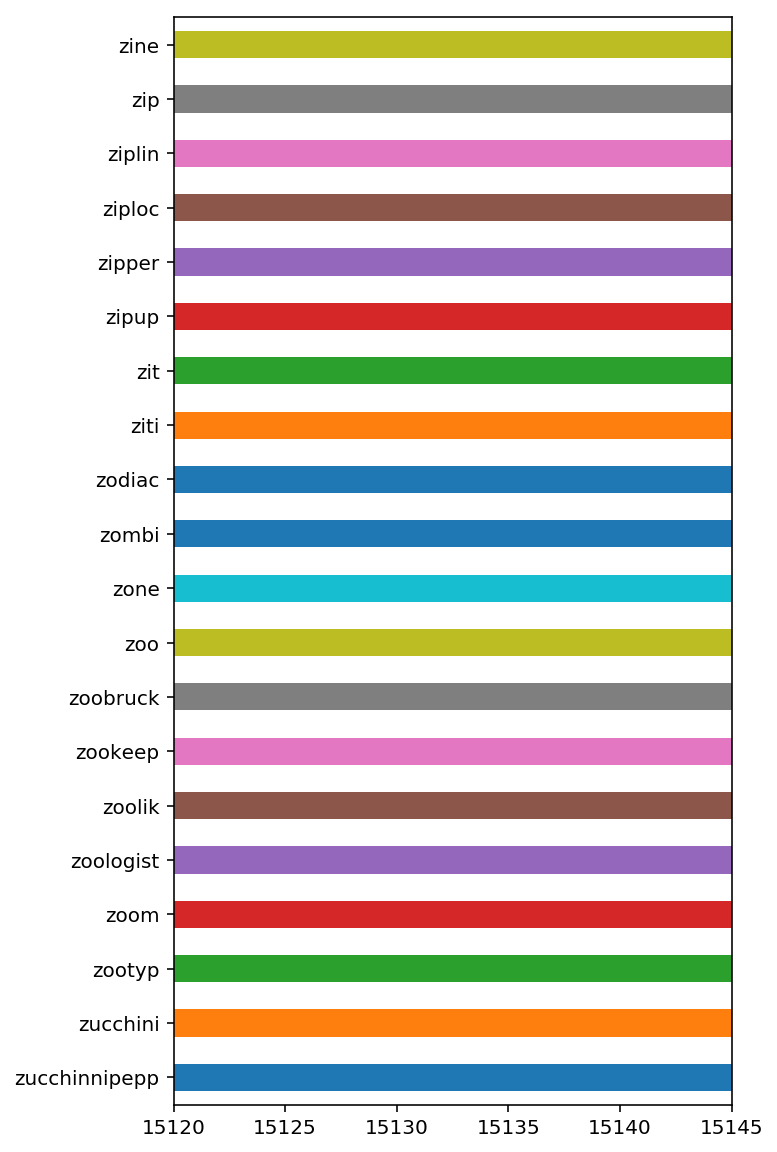

In [59]:
# lists to store the vocab and counts
vocab = []
count = []
# iterate through each vocab and count append the value to designated lists
for key, value in dictionary:
    vocab.append(key)
    count.append(value)
# store the count in panadas dataframe with vocab as index
vocab_after_stem = pd.Series(count, index=vocab)
# sort the dataframe
vocab_after_stem = vocab_after_stem.sort_values(ascending=False)
# plot of the top vocab
top_vacab = vocab_after_stem.head(20)
top_vacab.plot(kind = 'barh', figsize=(5,10), xlim= (15120, 15145))

In [95]:
# extract the tfid representation matrix of the text data
tfid_matrix = tfid_vectorizer.transform(all_captions['stem_caps'][:100])
# collect the tfid matrix in numpy array
arr = tfid_matrix.todense()
# tfid_matrix = tfid_vectorizer.fit_transform(all_captions['stem_caps'])


In [96]:
df = pd.DataFrame(arr)
df

,0,1,2,3,4,5,6,7,8,9,...,16832,16833,16834,16835,16836,16837,16838,16839,16840,16841
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
